<a href="https://colab.research.google.com/github/GustavoEnzo/FruitClassify/blob/main/ProcImg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install ultralytics

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [ ]:
from IPython import display
display.clear_output()


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mmVw0daAJaDUZw2BVb1x")
project = rf.workspace("weed-vwg2q").project("food-quality-analysis")
version = project.version(1)
dataset = version.download("folder")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.6 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Food-Quality-Analysis-1 in folder:: 100%|██████████| 9031/9031 [00:01<00:00, 8781.36it/s]


In [ ]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8n-cls.pt data={dataset.location} epochs=50 imgsz=128

[Errno 2] No such file or directory: '{HOME}'
/content
100% 5.31M/5.31M [00:00<00:00, 83.3MB/s]
Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/Food-Quality-Analysis-1, epochs=50, time=None, patience=100, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, 

In [ ]:
!ls /content/runs/classify/train/


args.yaml					    train_batch18000.jpg   val_batch1_labels.jpg
confusion_matrix_normalized.png			    train_batch18001.jpg   val_batch1_pred.jpg
confusion_matrix.png				    train_batch18002.jpg   val_batch2_labels.jpg
events.out.tfevents.1723951469.c42067ea93fe.7898.0  train_batch1.jpg	   val_batch2_pred.jpg
results.csv					    train_batch2.jpg	   weights
results.png					    val_batch0_labels.jpg
train_batch0.jpg				    val_batch0_pred.jpg


In [ ]:
!cat /content/runs/classify/train/results.csv | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                 1.0894,                0.96333,                      1,                 1.4571,             0.00023747,             0.00023747,             0.00023747
                      2,                0.25912,                0.98333,                      1,                 1.4022,             0.00046606,             0.00046606,             0.00046606
                      3,                 0.1784,                0.98778,                      1,                 1.3925,             0.00068522,             0.00068522,             0.00068522
                      4,                 0.1512,                   0.99,                      1,                 1.3932,             0.00067159,             0.00067159,             0.00067159
                      5,                

In [ ]:
%cd /content

!yolo task=classify mode=val model=/content/runs/classify/train/weights/best.pt data={dataset.location}

/content
Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,446,409 parameters, 0 gradients, 3.3 GFLOPs
train: /content/Food-Quality-Analysis-1/train... found 7199 images in 9 classes ✅ 
val: /content/Food-Quality-Analysis-1/val... found 900 images in 9 classes ✅ 
test: /content/Food-Quality-Analysis-1/test... found 900 images in 9 classes ✅ 
val: Scanning /content/Food-Quality-Analysis-1/val... 900 images, 0 corrupt: 100% 900/900 [00:00<00:00, 5463.26it/s]
val: New cache created: /content/Food-Quality-Analysis-1/val.cache
               classes   top1_acc   top5_acc: 100% 57/57 [00:02<00:00, 19.43it/s]
                   all      0.999          1
Speed: 0.1ms preprocess, 1.3ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val6
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
%cd /content
!yolo task=classify mode=predict model=/content/runs/classify/train/weights/best.pt conf=0.25 source=/content/Food-Quality-Analysis-1/test/Apple



/content
Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,446,409 parameters, 0 gradients, 3.3 GFLOPs

image 1/99 /content/Food-Quality-Analysis-1/test/Apple/IMG20200728130120_jpg.rf.e31eda0458511f2f196c7a59716b1ea2.jpg: 128x128 Apple 1.00, Banana_Good 0.00, Pomegranate 0.00, Pomegranate_Good 0.00, Banana 0.00, 5.8ms
image 2/99 /content/Food-Quality-Analysis-1/test/Apple/IMG20200728130134_jpg.rf.2be5466383117079b6485b8eb860b6fd.jpg: 128x128 Apple 1.00, Pomegranate 0.00, Banana_Good 0.00, Banana_Bad 0.00, Pomegranate_Good 0.00, 3.8ms
image 3/99 /content/Food-Quality-Analysis-1/test/Apple/IMG20200728130225_jpg.rf.aec90080d52b66d6502a8a251df8cb9f.jpg: 128x128 Apple 1.00, Apple_Good 0.00, Pomegranate 0.00, Pomegranate_Bad 0.00, Pomegranate_Good 0.00, 3.5ms
image 4/99 /content/Food-Quality-Analysis-1/test/Apple/IMG20200728130348_jpg.rf.5a7bffe16741e88715bc75b4f9e36be9.jpg: 128x128 Apple 1.00, Apple_Good 0.00, Po

In [ ]:
%cd /content
!yolo task=classify mode=predict model=/content/runs/classify/train/weights/best.pt conf=0.25 source=/content/apple.mp4


/content
Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,446,409 parameters, 0 gradients, 3.3 GFLOPs

video 1/1 (frame 1/1436) /content/apple.mp4: 128x128 Banana 0.18, Pomegranate_Good 0.13, Pomegranate_Bad 0.13, Apple_Good 0.10, Banana_Bad 0.10, 3.0ms
video 1/1 (frame 2/1436) /content/apple.mp4: 128x128 Banana 0.18, Pomegranate_Good 0.13, Pomegranate_Bad 0.13, Apple_Good 0.10, Banana_Bad 0.10, 3.1ms
video 1/1 (frame 3/1436) /content/apple.mp4: 128x128 Banana 0.18, Pomegranate_Good 0.13, Pomegranate_Bad 0.13, Apple_Good 0.10, Banana_Bad 0.10, 3.1ms
video 1/1 (frame 4/1436) /content/apple.mp4: 128x128 Banana 0.18, Pomegranate_Good 0.13, Pomegranate_Bad 0.13, Apple_Good 0.10, Banana_Bad 0.10, 6.9ms
video 1/1 (frame 5/1436) /content/apple.mp4: 128x128 Banana 0.18, Pomegranate_Good 0.13, Pomegranate_Bad 0.13, Apple_Good 0.10, Banana_Bad 0.10, 3.0ms
video 1/1 (frame 6/1436) /content/apple.mp4: 128x128 Banana 0.

In [ ]:
!ffmpeg -i /content/runs/classify/predict10/apple.avi /content/runs/classify/predict10/apple.mp4


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
%cd /content
!yolo task=classify mode=predict model=/content/runs/classify/train/weights/best.pt conf=0.25 source=/content/apple.mp4


/content
Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-cls summary (fused): 73 layers, 1,446,409 parameters, 0 gradients, 3.3 GFLOPs

video 1/1 (frame 1/1436) /content/apple.mp4: 128x128 Banana 0.18, Pomegranate_Good 0.13, Pomegranate_Bad 0.13, Apple_Good 0.10, Banana_Bad 0.10, 2.9ms
video 1/1 (frame 2/1436) /content/apple.mp4: 128x128 Banana 0.18, Pomegranate_Good 0.13, Pomegranate_Bad 0.13, Apple_Good 0.10, Banana_Bad 0.10, 3.2ms
video 1/1 (frame 3/1436) /content/apple.mp4: 128x128 Banana 0.18, Pomegranate_Good 0.13, Pomegranate_Bad 0.13, Apple_Good 0.10, Banana_Bad 0.10, 2.9ms
video 1/1 (frame 4/1436) /content/apple.mp4: 128x128 Banana 0.18, Pomegranate_Good 0.13, Pomegranate_Bad 0.13, Apple_Good 0.10, Banana_Bad 0.10, 3.1ms
video 1/1 (frame 5/1436) /content/apple.mp4: 128x128 Banana 0.18, Pomegranate_Good 0.13, Pomegranate_Bad 0.13, Apple_Good 0.10, Banana_Bad 0.10, 3.2ms
video 1/1 (frame 6/1436) /content/apple.mp4: 128x128 Banana 0.

In [ ]:
from google.colab import files



In [ ]:
uploaded = files.upload()


Saving banana.mp4 to banana.mp4


In [ ]:
!ls


apple.mp4  banana.mp4  Food-Quality-Analysis-1	runs  yolov8n-cls.pt  yolov8n.pt


In [ ]:
%cd /content
!yolo task=classify mode=predict model=/content/runs/classify/train/weights/best.pt conf=0.25 source=/content/banana.mp4

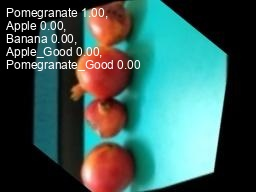

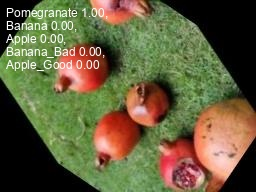

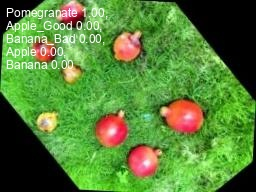

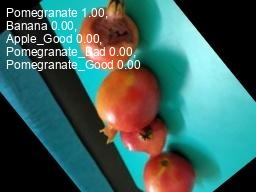

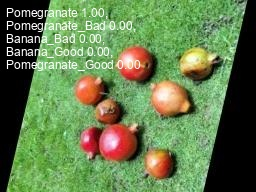

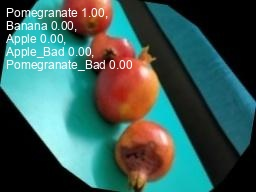

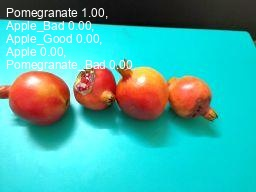

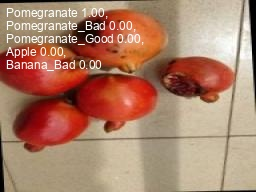

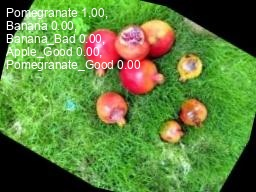

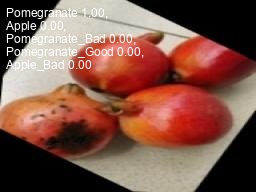

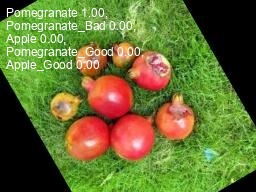

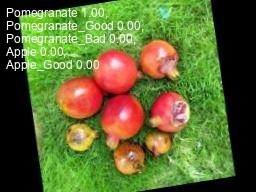

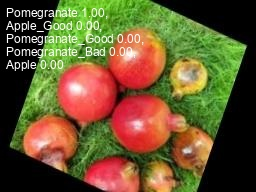

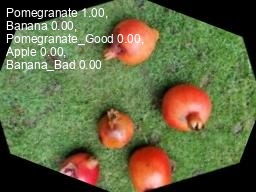

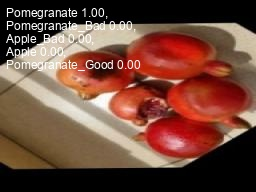

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/classify/predict7/*.jpg')[:15]:
      display(Image(filename=image_path, width=600))
      print("\n")

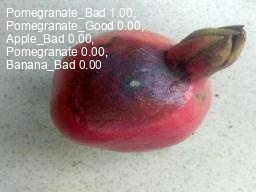

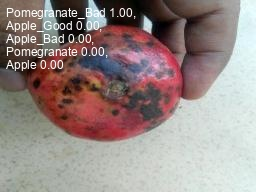

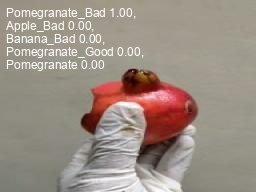

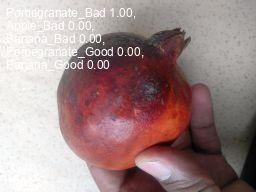

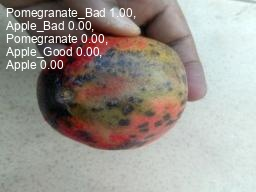

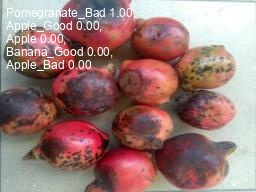

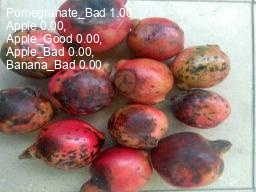

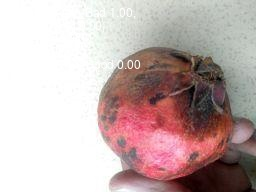

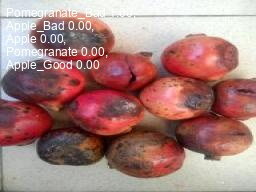

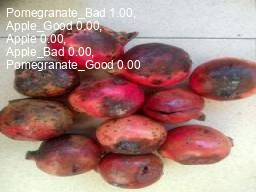

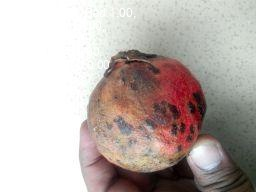

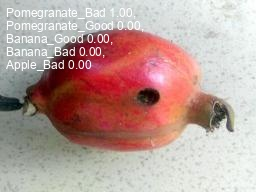

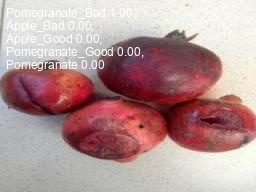

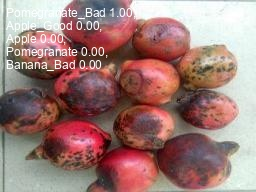

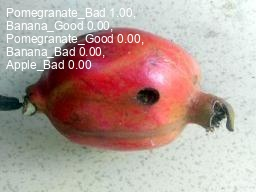

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/classify/predict8/*.jpg')[:15]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8-cls", model_path=f"/content/runs/classify/train/")

Dependency ultralytics==8.0.196 is required but found version=8.2.78, to fix: `pip install ultralytics==8.0.196`
Would you like to continue with the wrong version of ultralytics? y/n: y
An error occured when getting the model upload URL: 404 Client Error: Not Found for url: https://api.roboflow.com/weed-vwg2q/food-quality-analysis/1/uploadModel?api_key=mmVw0daAJaDUZw2BVb1x&modelType=yolov8-cls&nocache=true
